From the FITS files

In [20]:
import importlib
utils = importlib.import_module('utils')
importlib.reload(utils)
from utils import *

In [21]:
# ISGRI: 15 - 30 keV
cr1, vr1, sg1, xp1, acr1, avr1, cr1_cpsf, cr1_psf, err1_cpsf, err1_psf, date1, _ = loadCrabIMG("../data/Crab/15-30keV/Images")
lc1, lc1_err, lc1_date = loadCrabLC("../data/Crab/15-30keV/Lightcurves")

# ISGRI: 30 - 60 keV
cr2, vr2, sg2, xp2, acr2, avr2, cr2_cpsf, cr2_psf, err2_cpsf, err2_psf, date2, _ = loadCrabIMG("../data/Crab/30-60keV/Images")
lc2, lc2_err, lc2_date = loadCrabLC("../data/Crab/30-60keV/Lightcurves")

# JEM-X: 3 - 15 keV
cr3, vr3, sg3, xp3, acr3, avr3, cr3_cpsf, cr3_psf, err3_cpsf, err3_psf, date3, _ = loadCrabIMG("../data/Crab/3-15keV/Images")
lc3, lc3_err, lc3_date = loadCrabLC("../data/Crab/3-15keV/Ligthcurves")

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 59272.189815 from DATE-OBS.
Set MJD-END to 59272.204306 from DATE-END'. [astropy.wcs.wcs]
/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:26: RuntimeWarning: invalid value encountered in scalar divide
  a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:27: RuntimeWarning: invalid value encountered in scalar divide
  b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:28: RuntimeWarning: invalid value encountered in scalar divide
  c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(t

Error processing file ../data/Crab/3-15keV/Images/268600140010.001mosaic.fits: list index out of range
Error processing file ../data/Crab/3-15keV/Images/054100190010.001mosaic.fits: list index out of range
Error processing file ../data/Crab/3-15keV/Images/036500830010.001mosaic.fits: list index out of range
Error processing file ../data/Crab/3-15keV/Images/060500110010.001mosaic.fits: list index out of range
Error processing file ../data/Crab/3-15keV/Images/048300560010.001mosaic.fits: list index out of range
Error processing file ../data/Crab/3-15keV/Images/101900900010.001mosaic.fits: list index out of range
Error processing file ../data/Crab/3-15keV/Images/077400150010.001mosaic.fits: list index out of range
Error processing file ../data/Crab/3-15keV/Images/035200470010.001mosaic.fits: list index out of range


15 - 30 keV

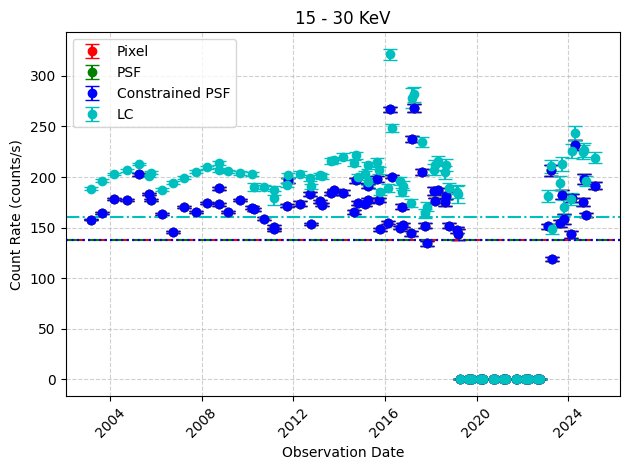

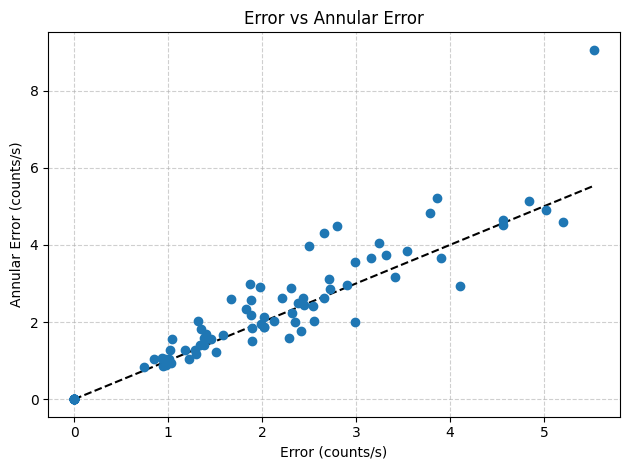

In [7]:
import matplotlib.pyplot as plt

img_times1 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S") for date in date1]
lc_times1 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%f") for date in lc1_date]

# Calculate averages and standard deviations
avg_cr1 = np.mean(cr1)
std_cr1 = np.std(cr1)
avg_psf1 = np.mean(cr1_psf)
std_psf1 = np.std(cr1_psf)
avg_cpsf1 = np.mean(cr1_cpsf)
std_cpsf1 = np.std(cr1_cpsf)

avg_lc1 = np.mean(lc1)
std_lc1 = np.std(lc1)

# Plot count rate over time with errorbars and std region
plt.figure()

plt.errorbar(img_times1, cr1, yerr=np.sqrt(vr1), color='r', fmt='o', capsize=5, label='Pixel')
plt.errorbar(img_times1, cr1_psf, yerr=np.sqrt(vr1), color='g', fmt='o', capsize=5, label='PSF')
plt.errorbar(img_times1, cr1_cpsf, yerr=np.sqrt(vr1), color='b', fmt='o', capsize=5, label='Constrained PSF')
plt.errorbar(lc_times1, lc1, yerr=lc1_err, color='c', fmt='o', capsize=5, label='LC')

plt.axhline(avg_cr1, color='r', linestyle='--')
plt.axhline(avg_psf1, color='g', linestyle='-.')
plt.axhline(avg_cpsf1, color='b', linestyle=':')
plt.axhline(avg_lc1, color='c', linestyle='-.')

plt.xlabel("Observation Date")
plt.ylabel("Count Rate (counts/s)")
plt.title("15 - 30 KeV")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()


# Plot error vs annular error
plt.figure()

# straight line
x = np.linspace(0, np.max(np.sqrt(vr1)), 100)
y = x
plt.plot(x, y, color='k', linestyle='--', label='y=x')

plt.errorbar(np.sqrt(vr1), np.sqrt(avr1), fmt='o', capsize=5)

plt.xlabel("Error (counts/s)")
plt.ylabel("Annular Error (counts/s)")
plt.title("Error vs Annular Error")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

Now for 30 - 60 keV range

/home/hthums/micromamba/envs/jupiter_xray/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hthums/micromamba/envs/jupiter_xray/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/hthums/micromamba/envs/jupiter_xray/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/hthums/micromamba/envs/jupiter_xray/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/hthums/micromamba/envs/jupiter_xray/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


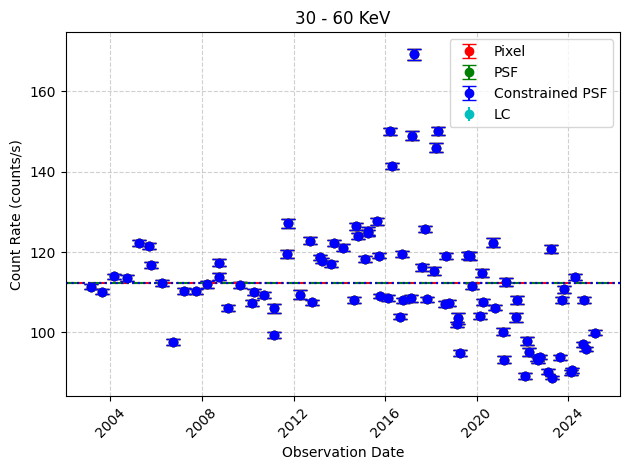

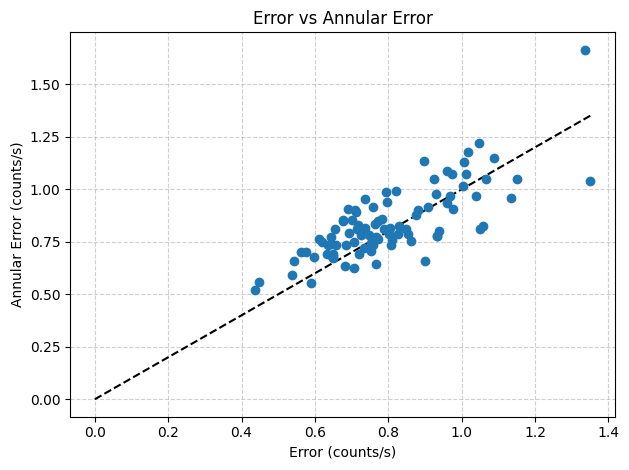

In [8]:
from datetime import datetime
import matplotlib.pyplot as plt

img_times2 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S") for date in date2]
lc_times2 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%f") for date in lc2_date]

# Calculate averages and standard deviations
avg_cr2 = np.mean(cr2)
std_cr2 = np.std(cr2)
avg_psf2 = np.mean(cr2_psf)
std_psf2 = np.std(cr2_psf)
avg_cpsf2 = np.mean(cr2_cpsf)
std_cpsf2 = np.std(cr2_cpsf)

avg_lc2 = np.mean(lc2)
std_lc2 = np.std(lc2)

# Plot count rate over time with errorbars and std region
plt.figure()

plt.errorbar(img_times2, cr2, yerr=np.sqrt(vr2), color='r', fmt='o', capsize=5, label='Pixel')
plt.errorbar(img_times2, cr2_psf, yerr=np.sqrt(vr2), color='g', fmt='o', capsize=5, label='PSF')
plt.errorbar(img_times2, cr2_cpsf, yerr=np.sqrt(vr2), color='b', fmt='o', capsize=5, label='Constrained PSF')
plt.errorbar(lc_times2, lc2, yerr=lc2_err, color='c', fmt='o', capsize=5, label='LC')

plt.axhline(avg_cr2, color='r', linestyle='--')
plt.axhline(avg_psf2, color='g', linestyle='-.')
plt.axhline(avg_cpsf2, color='b', linestyle=':')
plt.axhline(avg_lc2, color='c', linestyle='-.')

plt.xlabel("Observation Date")
plt.ylabel("Count Rate (counts/s)")
plt.title("30 - 60 KeV")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()


# Plot error vs annular error
plt.figure()

# straight line
x = np.linspace(0, np.max(np.sqrt(vr2)), 100)
y = x
plt.plot(x, y, color='k', linestyle='--', label='y=x')

plt.errorbar(np.sqrt(vr2), np.sqrt(avr2), fmt='o', capsize=5)

plt.xlabel("Error (counts/s)")
plt.ylabel("Annular Error (counts/s)")
plt.title("Error vs Annular Error")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

Finally for JEM-X (3 - 15 keV)

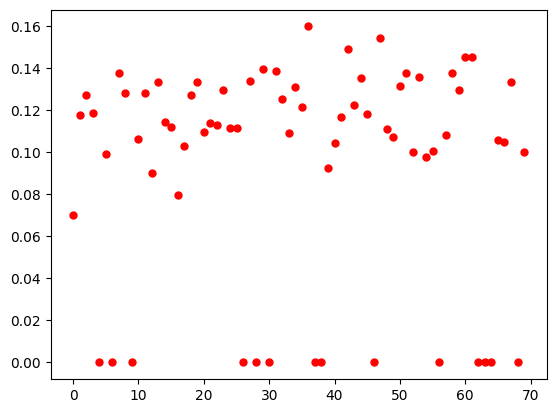

In [13]:
plt.plot(cr3_cpsf, linestyle='', color='r', label='Crab 3-15 keV', marker='o', markersize=5)

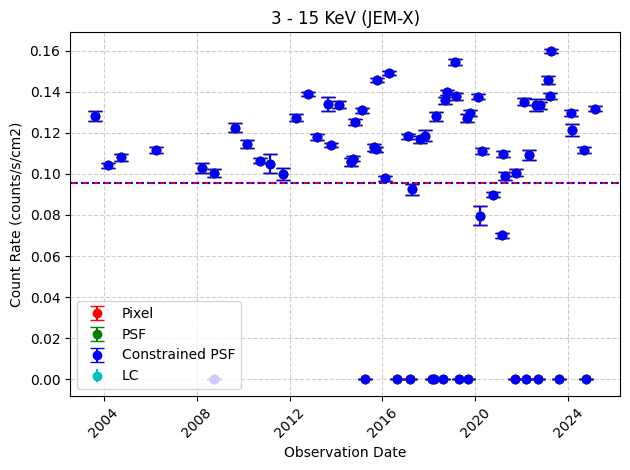

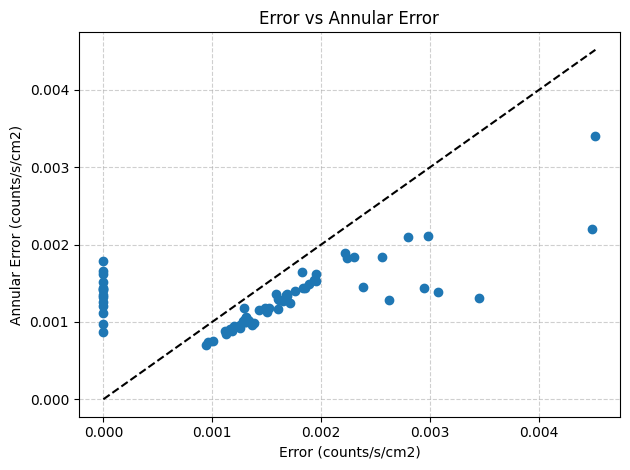

In [26]:
from datetime import datetime
import matplotlib.pyplot as plt

img_times3 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%f") for date in date3]
lc_times3 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%f") for date in lc3_date]

# Calculate averages and standard deviations
avg_cr3 = np.mean(cr3)
std_cr3 = np.std(cr3)
avg_psf3 = np.mean(cr2_psf)
std_psf3 = np.std(cr3_psf)
avg_cpsf3 = np.mean(cr3_cpsf)
std_cpsf3 = np.std(cr3_cpsf)

avg_lc3 = np.mean(lc3)
std_lc3 = np.std(lc3)

# Plot count rate over time with errorbars and std region
plt.figure()

plt.errorbar(img_times3, cr3, yerr=np.sqrt(vr3), color='r', fmt='o', capsize=5, label='Pixel')
plt.errorbar(img_times3, cr3_psf, yerr=np.sqrt(vr3), color='g', fmt='o', capsize=5, label='PSF')
plt.errorbar(img_times3, cr3_cpsf, yerr=np.sqrt(vr3), color='b', fmt='o', capsize=5, label='Constrained PSF')
plt.errorbar(lc_times3, lc3, yerr=lc3_err, color='c', fmt='o', capsize=5, label='LC')

plt.axhline(avg_cr3, color='r', linestyle='--')
#plt.axhline(avg_psf3, color='g', linestyle='-.')
plt.axhline(avg_cpsf3, color='b', linestyle=':')
plt.axhline(avg_lc3, color='c', linestyle='-.')

plt.xlabel("Observation Date")
plt.ylabel("Count Rate (counts/s/cm2)")
plt.title("3 - 15 KeV (JEM-X)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()


# Plot error vs annular error
plt.figure()

# straight line
x = np.linspace(0, np.max(np.sqrt(vr3)), 100)
y = x
plt.plot(x, y, color='k', linestyle='--', label='y=x')

plt.errorbar(np.sqrt(vr3), np.sqrt(avr3), fmt='o', capsize=5)

plt.xlabel("Error (counts/s/cm2)")
plt.ylabel("Annular Error (counts/s/cm2)")
plt.title("Error vs Annular Error")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

Weighted averages

In [ ]:
# Calculate weighted averages for 15 - 30 keV
total_15_30, yearly_15_30 = weighted_avg(date1, cr1, vr1)
total_15_30_psf, yearly_15_30_psf = weighted_avg(date1, cr1_psf, vr1)
total_15_30_cpsf, yearly_15_30_cpsf = weighted_avg(date1, cr1_cpsf, vr1)
total_15_30_lc, yearly_15_30_lc = weighted_avg(lc1_date, lc1, lc1_err)

# Calculate weighted averages for 30 - 60 keV
total_30_60, yearly_30_60 = weighted_avg(date2, cr2, vr2)
total_30_60_psf, yearly_30_60_psf = weighted_avg(date2, cr2_psf, vr2)
total_30_60_cpsf, yearly_30_60_cpsf = weighted_avg(date2, cr2_cpsf, vr2)
total_30_60_lc, yearly_30_60_lc = weighted_avg(lc2_date, lc2, lc2_err)

# Calculate weighted averages for 3 - 15 keV
total_3_15, yearly_3_15 = weighted_avg(date3, cr3, vr3)
total_3_15_psf, yearly_3_15_psf = weighted_avg(date3, cr3_psf, vr3)
total_3_15_cpsf, yearly_3_15_cpsf = weighted_avg(date3, cr3_cpsf, vr3)
total_3_15_lc, yearly_3_15_lc = weighted_avg(lc3_date, lc3, lc3_err)

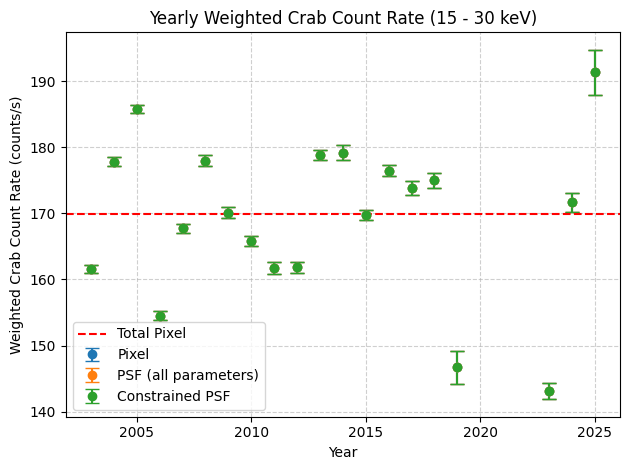

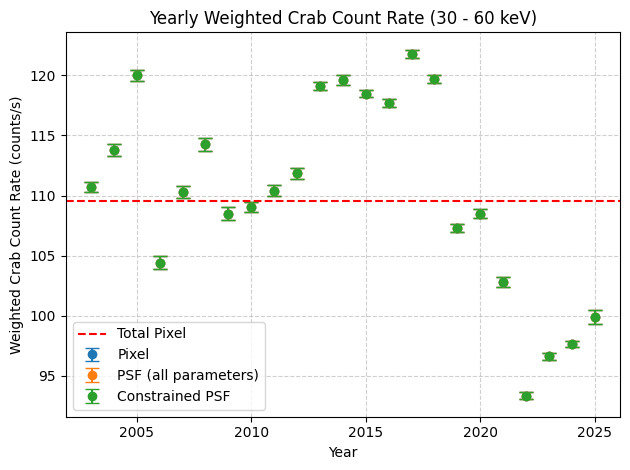

In [ ]:
import matplotlib.pyplot as plt

# Plot for 15 - 30 keV
plt.figure()
plt.errorbar(list(yearly_15_30.keys()), 
             [result['weighted_mean'] for result in yearly_15_30.values()], 
             yerr=[result['weighted_std'] for result in yearly_15_30.values()], 
             fmt='o', capsize=5, label='Pixel')
plt.errorbar(list(yearly_15_30_psf.keys()), 
             [result['weighted_mean'] for result in yearly_15_30_psf.values()], 
             yerr=[result['weighted_std'] for result in yearly_15_30_psf.values()], 
             fmt='o', capsize=5, label='PSF (all parameters)')
plt.errorbar(list(yearly_15_30_cpsf.keys()), 
             [result['weighted_mean'] for result in yearly_15_30_cpsf.values()], 
             yerr=[result['weighted_std'] for result in yearly_15_30_cpsf.values()], 
             fmt='o', capsize=5, label='Constrained PSF')
plt.errorbar(list(yearly_15_30_lc.keys()),
             [result['weighted_mean'] for result in yearly_15_30_lc.values()],
             yerr=[result['weighted_std'] for result in yearly_15_30_lc.values()],
             fmt='o', capsize=5, label='LC')

plt.axhline(total_15_30['weighted_mean'], color='r', linestyle='--', label='Total Pixel')
# plt.axhline(total_15_30_psf['weighted_mean'], color='g', linestyle='-.', label='Total PSF')
# plt.axhline(total_15_30_cpsf['weighted_mean'], color='b', linestyle=':', label='Total Constrained PSF')
# plt.axhline(total_15_30_lc['weighted_mean'], color='c', linestyle=':', label='Total LC')

plt.xlabel("Year")
plt.ylabel("Weighted Crab Count Rate (counts/s)")
plt.title("Yearly Weighted Crab Count Rate (15 - 30 keV)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Plot for 30 - 60 keV
plt.figure()
plt.errorbar(list(yearly_30_60.keys()), 
             [result['weighted_mean'] for result in yearly_30_60.values()], 
             yerr=[result['weighted_std'] for result in yearly_30_60.values()], 
             fmt='o', capsize=5, label='Pixel')
plt.errorbar(list(yearly_30_60_psf.keys()), 
             [result['weighted_mean'] for result in yearly_30_60_psf.values()], 
             yerr=[result['weighted_std'] for result in yearly_30_60_psf.values()], 
             fmt='o', capsize=5, label='PSF (all parameters)')
plt.errorbar(list(yearly_30_60_cpsf.keys()), 
             [result['weighted_mean'] for result in yearly_30_60_cpsf.values()], 
             yerr=[result['weighted_std'] for result in yearly_30_60_cpsf.values()], 
             fmt='o', capsize=5, label='Constrained PSF')
plt.errorbar(list(yearly_30_60_lc.keys()),
             [result['weighted_mean'] for result in yearly_30_60_lc.values()],
             yerr=[result['weighted_std'] for result in yearly_30_60_lc.values()],
             fmt='o', capsize=5, label='LC')

plt.axhline(total_30_60['weighted_mean'], color='r', linestyle='--', label='Total Pixel')
# plt.axhline(total_30_60_psf['weighted_mean'], color='g', linestyle='-.', label='Total PSF')
# plt.axhline(total_30_60_cpsf['weighted_mean'], color='b', linestyle=':', label='Total Constrained PSF')
# plt.axhline(total_30_60_lc['weighted_mean'], color='c', linestyle=':', label='Total LC')

plt.xlabel("Year")
plt.ylabel("Weighted Crab Count Rate (counts/s)")
plt.title("Yearly Weighted Crab Count Rate (30 - 60 keV)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Plot for 3 - 15 keV
plt.figure()
plt.errorbar(list(yearly_3_15.keys()), 
             [result['weighted_mean'] for result in yearly_3_15.values()], 
             yerr=[result['weighted_std'] for result in yearly_3_15.values()], 
             fmt='o', capsize=5, label='Pixel')
plt.errorbar(list(yearly_3_15_psf.keys()),
             [result['weighted_mean'] for result in yearly_3_15_psf.values()], 
             yerr=[result['weighted_std'] for result in yearly_3_15_psf.values()], 
             fmt='o', capsize=5, label='PSF (all parameters)')
plt.errorbar(list(yearly_3_15_cpsf.keys()),
             [result['weighted_mean'] for result in yearly_3_15_cpsf.values()], 
             yerr=[result['weighted_std'] for result in yearly_3_15_cpsf.values()], 
             fmt='o', capsize=5, label='Constrained PSF')
plt.errorbar(list(yearly_3_15_lc.keys()),
             [result['weighted_mean'] for result in yearly_3_15_lc.values()], 
             yerr=[result['weighted_std'] for result in yearly_3_15_lc.values()], 
             fmt='o', capsize=5, label='LC')

plt.axhline(total_3_15['weighted_mean'], color='r', linestyle='--', label='Total Pixel')
# plt.axhline(total_3_15_psf['weighted_mean'], color='g', linestyle='-.', label='Total PSF')
# plt.axhline(total_3_15_cpsf['weighted_mean'], color='b', linestyle=':', label='Total Constrained PSF')
# plt.axhline(total_3_15_lc['weighted_mean'], color='c', linestyle=':', label='Total LC')

plt.xlabel("Year")
plt.ylabel("Weighted Crab Count Rate (counts/s)")
plt.title("Yearly Weighted Crab Count Rate (3 - 15 keV)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()